#### 미세먼지 현황 분석

#### 데이터 수집 사이트

- 에어코리아: https://www.airkorea.or.kr/index
- 기상청 : https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56

In [1]:
import pandas as pd
import numpy as np

In [4]:
# 데이터 저장할 곳 만드는 것
dust2210 = pd.read_excel('./raw/202210_data_past_day.xlsx')
dust2210.drop(axis=0, index=[0], inplace=True)   #axis= 행 , 두번째 행 삭제
dust2210

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,2022-10-01,77,60,0.029,0.046,0.9,0.003
2,2022-10-02,37,27,0.021,0.027,0.7,0.003
3,2022-10-03,10,8,0.018,0.014,0.6,0.002
4,2022-10-04,18,8,0.016,0.017,0.6,0.002
5,2022-10-05,19,8,0.014,0.022,0.6,0.003
6,2022-10-06,9,4,0.011,0.020,0.5,0.003
7,2022-10-07,13,6,0.011,0.024,0.5,0.003
8,2022-10-08,10,5,0.012,0.025,0.5,0.003
9,2022-10-09,8,4,0.019,0.018,0.4,0.002
10,2022-10-10,9,4,0.022,0.013,0.3,0.002


In [5]:
dust2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 1 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      31 non-null     object
 1   PM10    31 non-null     object
 2   PM2.5   31 non-null     object
 3   오 존     31 non-null     object
 4   이산화질소   31 non-null     object
 5   일산화탄소   31 non-null     object
 6   아황산가스   31 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [7]:
# 컬럼명을 영문으로
dust2210.rename(columns={'날짜':'date','Pm10': 'pm10', 'PM2.5': 'pm25',
                         '오 존':'o3', '이산화탄소':'no2','일산화탄소':'co', '아황산가스':'xo2'}, inplace=True)
dust2210

,date,PM10,pm25,o3,이산화질소,co,xo2
1,2022-10-01,77,60,0.029,0.046,0.9,0.003
2,2022-10-02,37,27,0.021,0.027,0.7,0.003
3,2022-10-03,10,8,0.018,0.014,0.6,0.002
4,2022-10-04,18,8,0.016,0.017,0.6,0.002
5,2022-10-05,19,8,0.014,0.022,0.6,0.003
6,2022-10-06,9,4,0.011,0.020,0.5,0.003
7,2022-10-07,13,6,0.011,0.024,0.5,0.003
8,2022-10-08,10,5,0.012,0.025,0.5,0.003
9,2022-10-09,8,4,0.019,0.018,0.4,0.002
10,2022-10-10,9,4,0.022,0.013,0.3,0.002


In [8]:
dust2210.dtypes

date     object
PM10     object
pm25     object
o3       object
이산화질소    object
co       object
xo2      object
dtype: object

In [52]:
dust2210.astype({'date':'datetime64[ns]','pm10':'int64','pm25':'int64','o3':'float64',
                'no2':'float64','co':'float64','so2':'float64'})
dust2210

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'pm10' not found in columns."

In [11]:
# 날짜를 년, 월, 일로 분해 컬럼 생성
dust2210['year'] = dust2210['date'].dt.year
dust2210['month'] = dust2210['date'].dt.year
dust2210['day'] = dust2210['date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [10]:
dust2210.tail()

,date,PM10,pm25,o3,이산화질소,co,xo2
27,2022-10-27,38,18,0.010,0.040,0.7,0.003
28,2022-10-28,47,30,0.010,0.038,0.8,0.003
29,2022-10-29,34,19,0.009,0.037,0.8,0.003
30,2022-10-30,28,18,0.011,0.034,0.8,0.003
31,2022-10-31,30,16,0.010,0.037,0.7,0.003


In [ ]:
# 컬럼순서 재정렬
dust2210 = dust2210[['date','year','month','day','so2','co','o3','no2','pm10','pm25']]
dust2210.head()

In [15]:
dust2210.isnull().sum()

date     0
PM10     0
pm25     0
o3       0
이산화질소    0
co       0
xo2      0
dtype: int64

#### 기상청 데이터 확인 및 전처리

In [16]:
weather_2210 = pd.read_excel('./raw/OBS_AWS_TIM_202210_data.xlsx')
weather_2210

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,400,강남,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,400,강남,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,400,강남,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,400,강남,2022-10-01 04:00:00,15.5,0.1,0.0,96
...,...,...,...,...,...,...,...
739,400,강남,2022-10-31 19:00:00,15.9,1.1,0.0,65
740,400,강남,2022-10-31 20:00:00,13.6,0.0,0.0,79
741,400,강남,2022-10-31 21:00:00,13.4,0.3,0.0,80
742,400,강남,2022-10-31 22:00:00,13.9,0.6,0.0,80


In [17]:
weather_2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       744 non-null    int64         
 1   지점명      744 non-null    object        
 2   일시       744 non-null    datetime64[ns]
 3   기온(°C)   744 non-null    float64       
 4   풍속(m/s)  694 non-null    float64       
 5   강수량(mm)  744 non-null    float64       
 6   습도(%)    744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 40.8+ KB


In [19]:
# 지점, 지점명 컬럼 삭제
weather_2210.drop('지점',axis=1, inplace=True)
weather_2210.drop('지점명',axis=1, inplace=True)

In [21]:
weather_2210.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,2022-10-01 04:00:00,15.5,0.1,0.0,96


In [22]:
weather_2210.columns = ['date','temp','wind','rain','humid']
weather_2210.head()

,date,temp,wind,rain,humid
0,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,2022-10-01 04:00:00,15.5,0.1,0.0,96


In [23]:
pd.to_datetime(weather_2210['date']).dt.date

0      2022-10-01
1      2022-10-01
2      2022-10-01
3      2022-10-01
4      2022-10-01
          ...    
739    2022-10-31
740    2022-10-31
741    2022-10-31
742    2022-10-31
743    2022-10-31
Name: date, Length: 744, dtype: object

In [28]:
weather_2210 = weather_2210.astype({'date':'datetime64[ns]'})

In [30]:
weather_2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   temp    744 non-null    float64       
 2   wind    694 non-null    float64       
 3   rain    744 non-null    float64       
 4   humid   744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.2 KB


In [31]:
weather_2210.head()

,date,temp,wind,rain,humid
0,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,2022-10-01 04:00:00,15.5,0.1,0.0,96


In [35]:
# 풍속 결정치
weather_2210['wind'].fillna(0.0, inplace=True)

In [34]:
weather_2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   temp    744 non-null    float64       
 2   wind    694 non-null    float64       
 3   rain    744 non-null    float64       
 4   humid   744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.2 KB


In [36]:
# 감수량은 0.1 단위로 측정 --> 0인 데이터는 0.01로 변경
weather_2210['rain'] = weather_2210['rain'].replace([0], 0.01)
weather_2210['rain'].value_counts()

rain
0.01     697
0.50      15
2.00       6
1.50       6
2.50       6
1.00       4
4.00       2
5.50       2
3.00       1
5.00       1
3.50       1
12.00      1
6.00       1
6.50       1
Name: count, dtype: int64

In [43]:
weather_2210_new  = weather_2210.groupby(weather_2210['date']).mean()
weather_2210_new.head()

,temp,wind,rain,humid
date,,,,
2022-10-01 00:00:00,18.0,0.0,0.01,93.0
2022-10-01 01:00:00,17.2,0.1,0.01,96.0
2022-10-01 02:00:00,16.3,0.0,0.01,96.0
2022-10-01 03:00:00,16.0,0.0,0.01,96.0
2022-10-01 04:00:00,15.5,0.1,0.01,96.0


#### 미세먼지, 날씨 데이터 병합

In [51]:
df_total = pd.merge(dust2210, weather_2210_new, how='inner', left_on='date', right_index=True)
df_total.tail()

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [ ]:
# 인덱스 재정리
df_total.reset_index(droop=True, inplace=True)

In [ ]:
df_total.tail()

##### 상관관계 시각화

In [49]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/HanSantteutDotum-Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [ ]:
# 모든 요소별 상관관계 학인
df_corr = df_total.corr()
df_corr

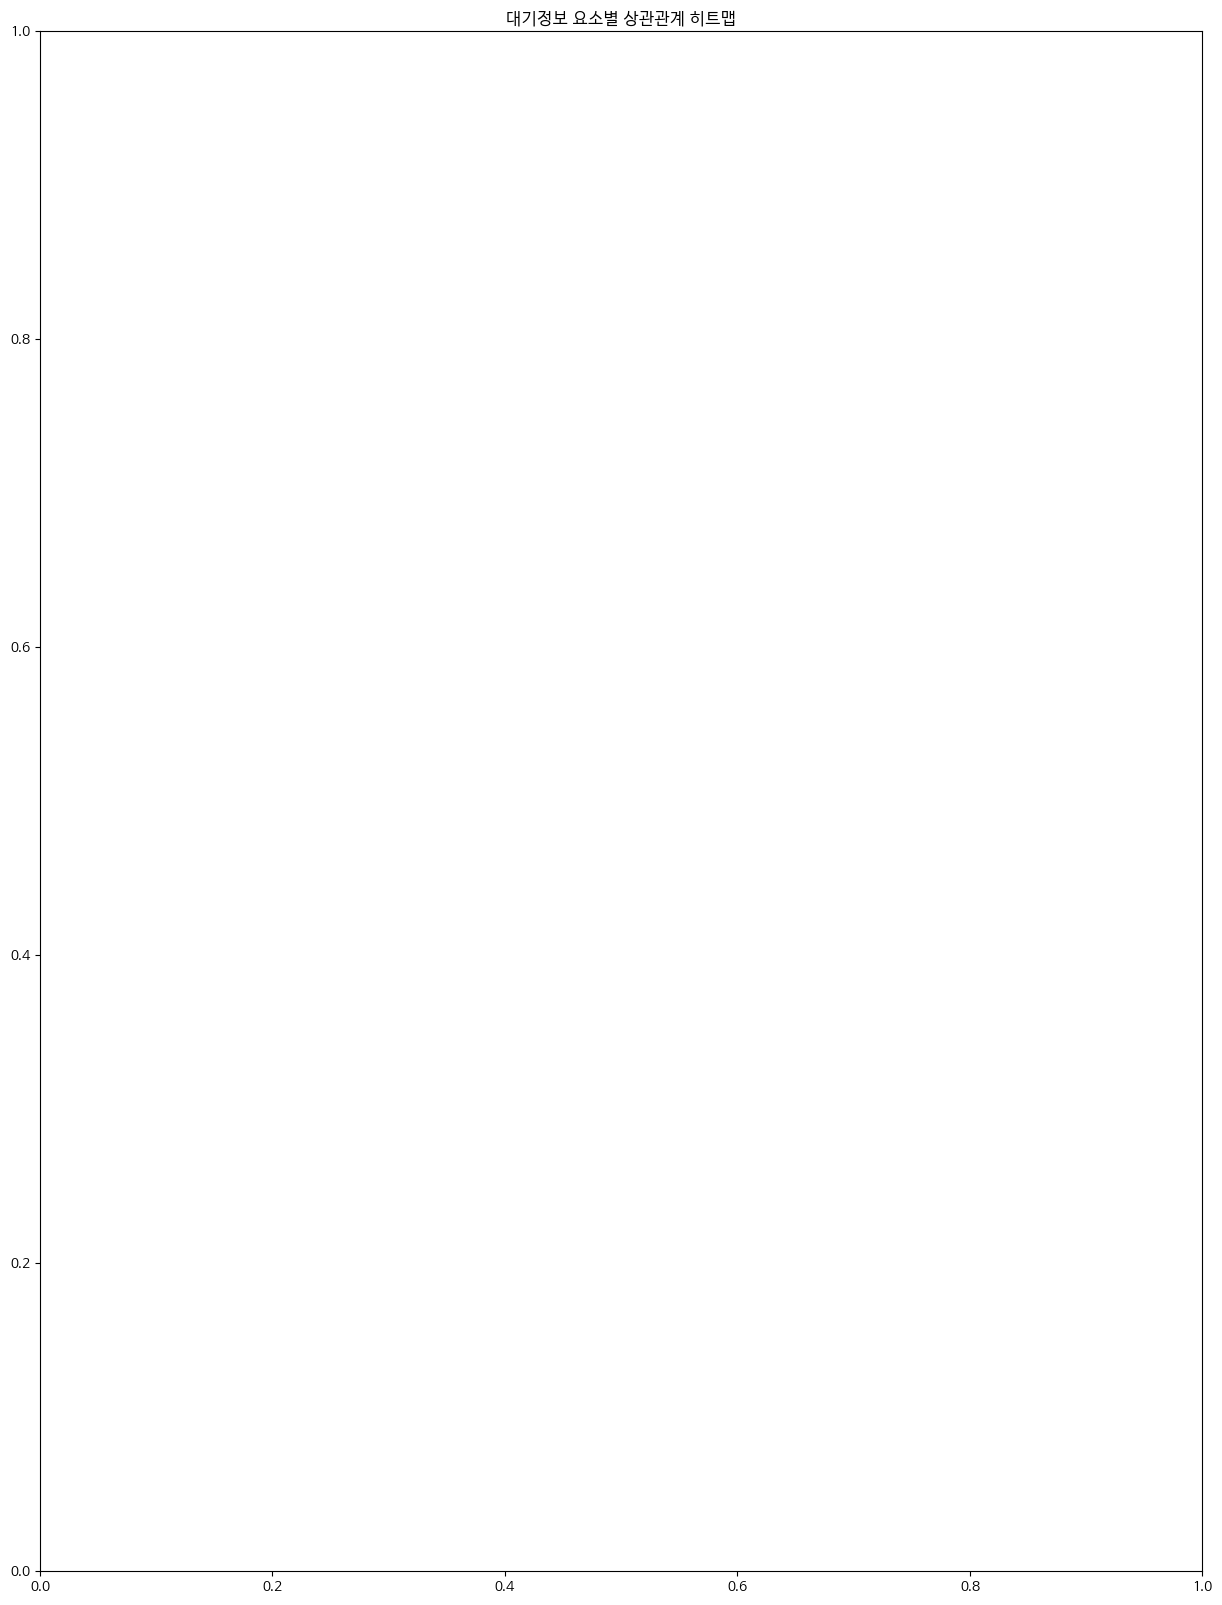

In [54]:
# 히트맵으로 상관관계 표시
plt.figure(figsize=(15,20))
plt.title('대기정보 요소별 상관관계 히트맵')

sns.heatmap(data=df_corr, annot=True, fmt='.2f', )

plt.show()

In [56]:
# 히스토그램 시각화
df_total.hist(bins=20, figsize=(20,15))
plt.show()

NameError: name 'df_total' is not defined

NameError: name 'df_total' is not defined

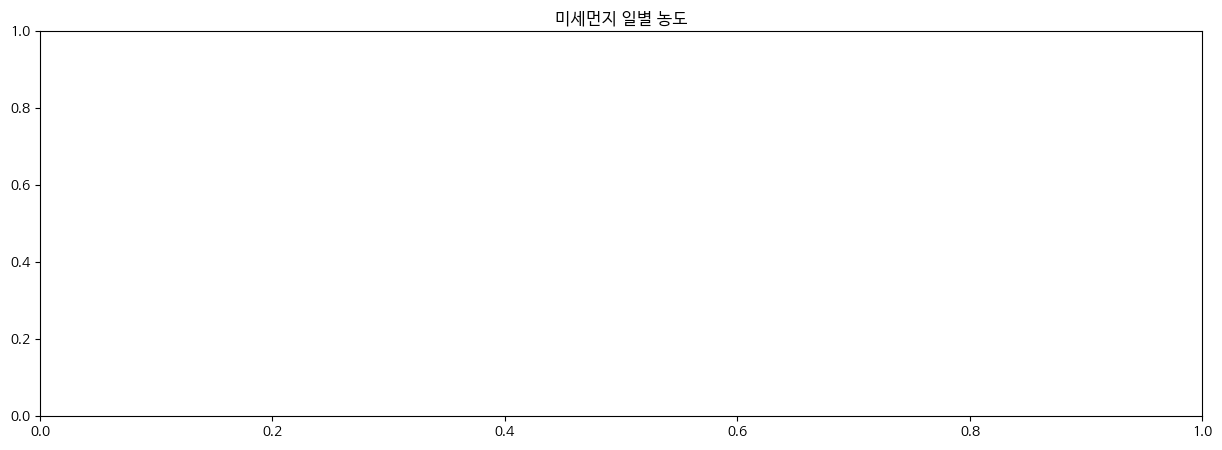

In [57]:
# 날짜별 미세먼지 농도 막대그래프
plt.figure(figsize=(15,5))
plt.title('미세먼지 일별 농도')
sns.barplot(x='day', y='pm10', data=df_total)
plt.xticks(rotation=0)
plt.show()

NameError: name 'df_total' is not defined

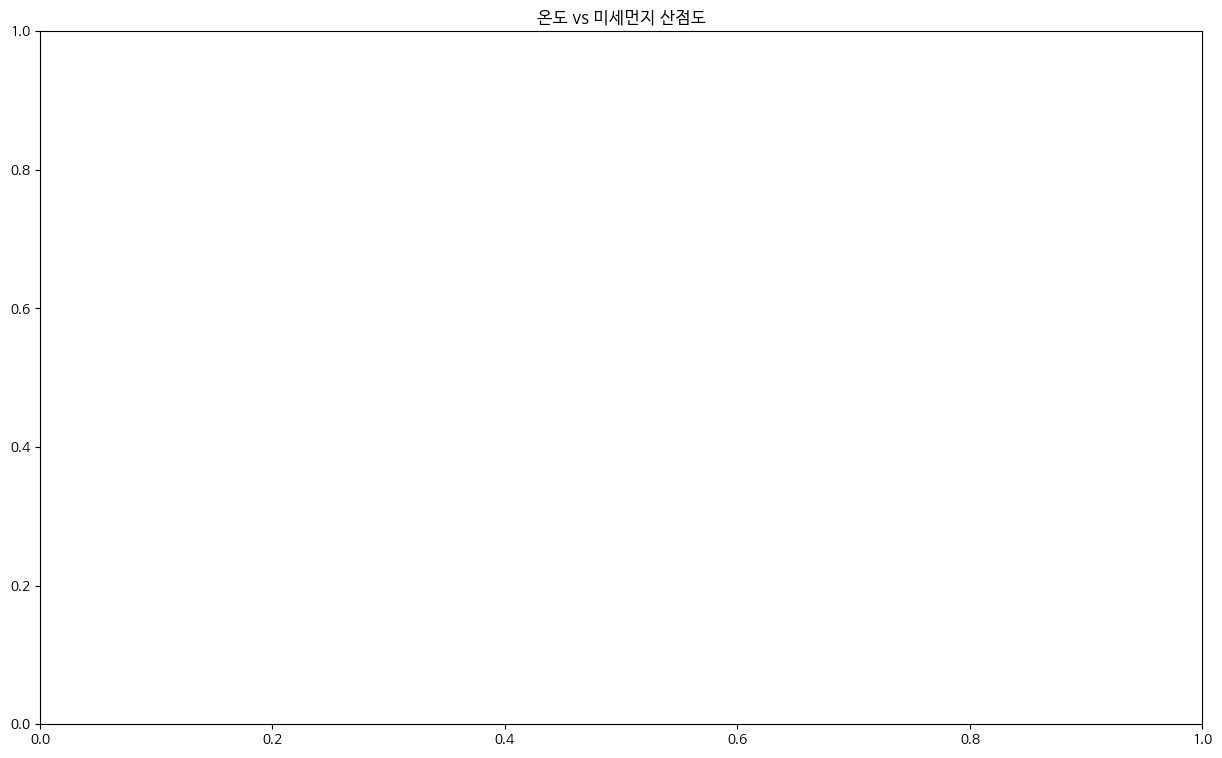

In [59]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 9))
plt.title('온도 vs 미세먼지 산점도')
plt.plot(df_total['temp'],df_total['pm10'],marker='0',linestyle='none',alpha=0.5)
plt.xlabel('온도(''c)')
plt.ylabel('미세먼지(''pm10)')
plt.show()

In [ ]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 9))
plt.title('미세먼지 vs 초미세먼지 산점도')
plt.plot(df_total['pm10'],df_total['pm25'],marker='0',linestyle='none',color='orange' ,alpha=0.5)
plt.xlabel('온도(''c)')
plt.ylabel('미세먼지(''pm25)')
plt.show()

NameError: name 'df_total' is not defined

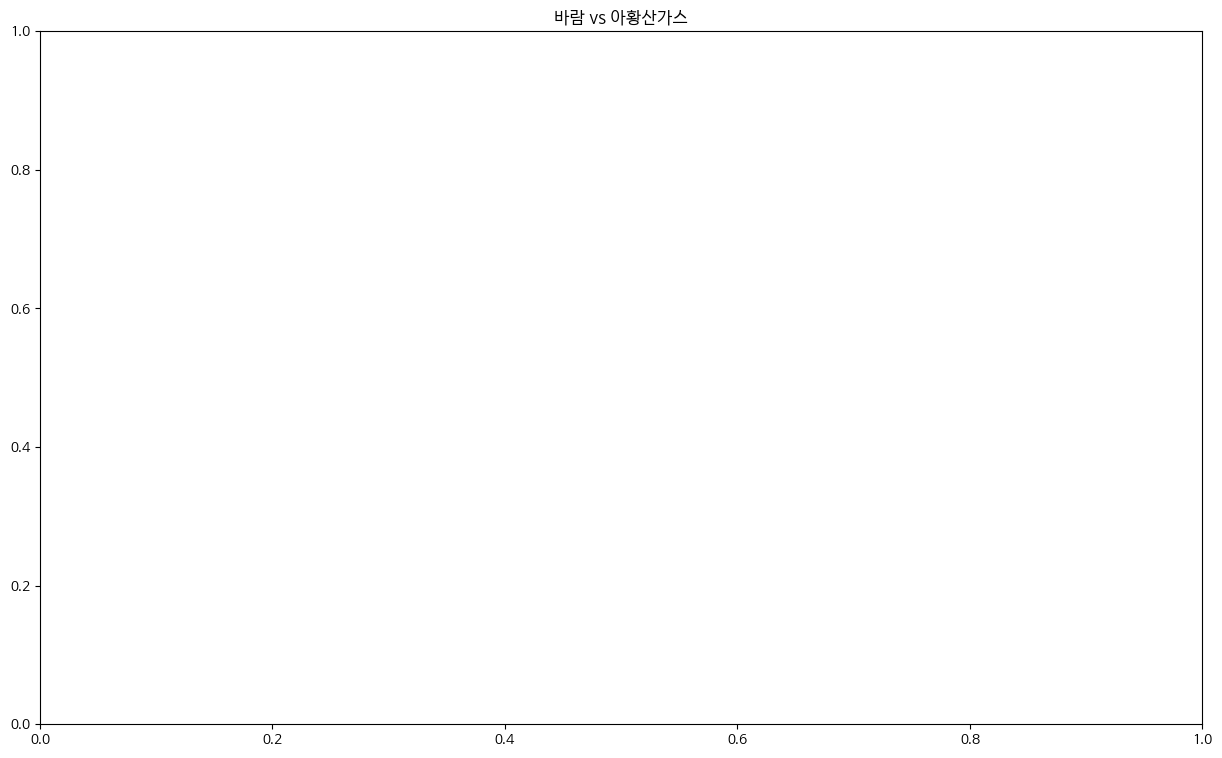

In [60]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 9))
plt.title('바람 vs 아황산가스')
plt.plot(df_total['wind'],df_total['no2'],marker='0',linestyle='none',color='yellow' ,alpha=0.5)
plt.xlabel('바람')
plt.ylabel('이산화질소(no2)')
plt.show()